<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Lesson8/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import model_selection
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
import joblib

In [201]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [202]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [203]:
df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,fuel_type,kms_driven,engine(cc),price(in lakhs)
0,Petrol,56000,2996.0,63.75
1,Petrol,30615,999.0,8.99
2,Diesel,24000,1995.0,23.75
3,Petrol,18378,1353.0,13.56
4,Petrol,44900,1798.0,24.00


# Завдання 1
Очистіть дані від викидів(лише `price`), розділіть на тренувальну та тестову чатини

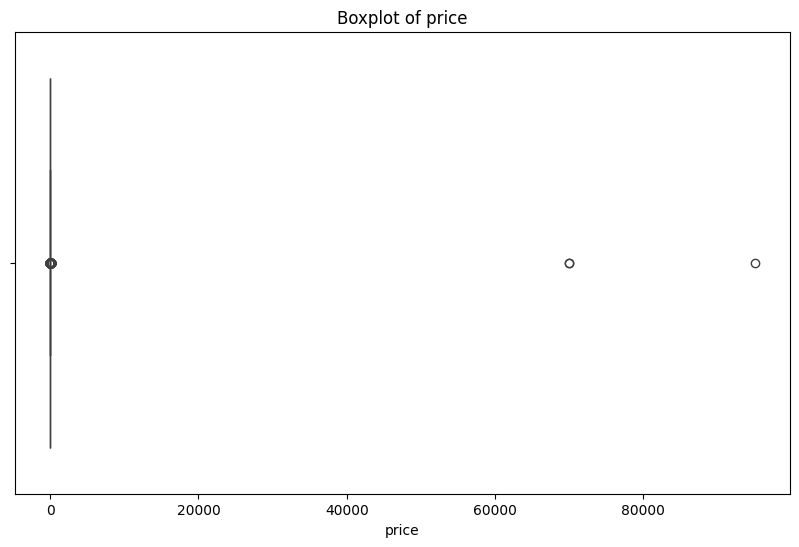

In [204]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price(in lakhs)'])
plt.title(f'Boxplot of price')
plt.xlabel('price')
plt.show()

In [205]:
df = df[df['price(in lakhs)'] <= 20000]

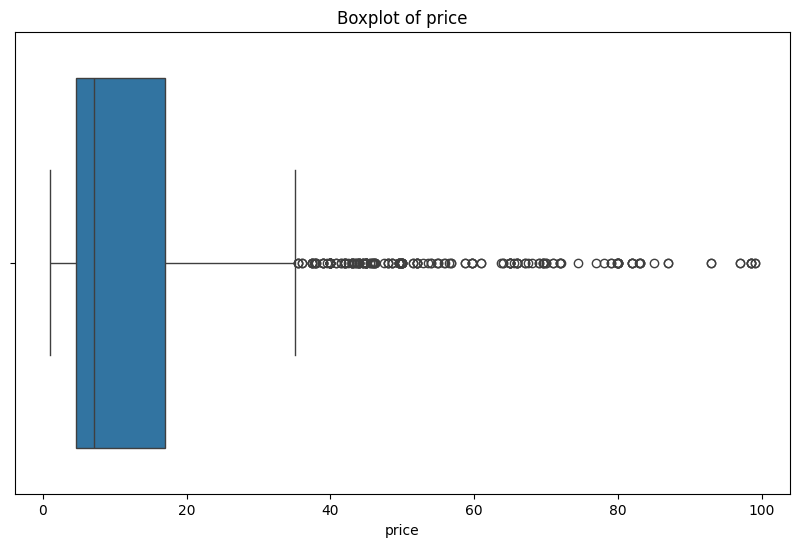

In [206]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price(in lakhs)'])
plt.title(f'Boxplot of price')
plt.xlabel('price')
plt.show()

In [207]:
X = df.drop(columns='price(in lakhs)')
y = df['price(in lakhs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1240
Testing set size: 310


# Завдання 2
Створіть Pipeline для обробки даних

In [208]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns


numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, weights='uniform'))
])

numeric_transformer

Pipeline(steps=[('imputer', KNNImputer())])

In [209]:
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, min_frequency=0.01))
    ]
)
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('ordinal',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                min_frequency=0.01, unknown_value=-1))])

In [210]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer())]),
                                 Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 min_frequency=0.01,
                                                                 unknown_value=-1))]),
                                 Index(['fuel_type'], dtype='object'))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [211]:
model = Pipeline(
    [("prep", preprocessor),
     ("tree", tree.DecisionTreeRegressor(max_depth=12,
                                         random_state=42)
     )
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  min_frequency=0.01,
                                                                                  unknown_value=-1))]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=12, random_state=42))])

In [212]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  min_frequency=0.01,
                                                                                  unknown_value=-1))]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=12, random_state=42))])

# Завдання 4
Виведіть основні метрики моделі

In [213]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MAPE", name] = metrics.mean_absolute_percentage_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [214]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,1.12,2.50
MAPE,0.14,0.34
RMSE,2.38,5.21
R2,0.98,0.92


Не працює що б я не робив😭

In [227]:
# dot_data = tree.export_graphviz(model['tree'], out_file=None,
#                                 feature_names =model['tree'].feature_names_in_)

# graph = graphviz.Source(dot_data)
# graph.render("cars tree")

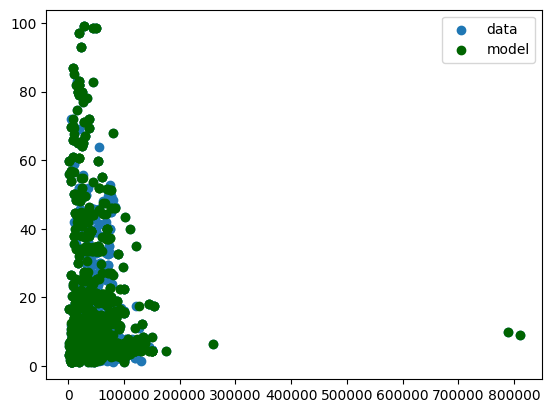

In [218]:
plt.scatter(X['kms_driven'], y, label='data')
plt.scatter(X['kms_driven'], model.predict(X), c='darkgreen', label='model')
plt.legend()

In [219]:
impotance = pd.DataFrame({'importance': model['tree'].feature_importances_},
                         index=model['tree'].feature_names_in_)

impotance.sort_values(by='importance', ascending=False, inplace=True)

impotance.round(3)

,importance
num__engine(cc),0.721
num__kms_driven,0.250
cat__fuel_type,0.028


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

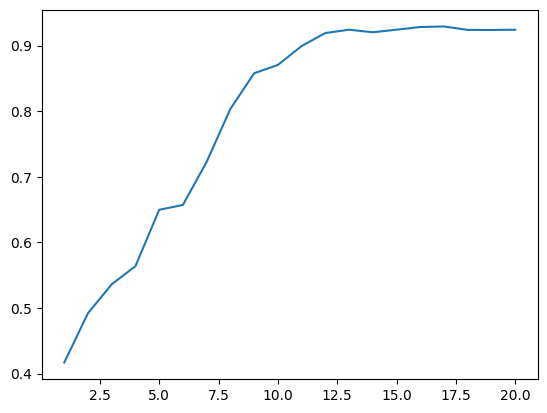

In [220]:
depths = range(1, 21)
r2 = []

for depth in depths:
  model = Pipeline(
      [("prep", preprocessor),
      ("tree", tree.DecisionTreeRegressor(max_depth=depth,
                                          random_state=42)
      )])
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  r2_value = metrics.r2_score(y_test, y_pred)
  r2.append(r2_value)


plt.plot(depths, r2)

# Завдання 6
Збережіть модель

In [221]:
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [222]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  min_frequency=0.01,
                                                                                  unknown_value=-1))]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('tree', DecisionTreeRegressor(max_depth=20, random_state=42))])